<a href="https://colab.research.google.com/github/mohamedyasser951/MachineLearning/blob/main/FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_lfw_people

In [153]:
faces = fetch_lfw_people(min_faces_per_person=60)
X = faces.data
y = faces.target
target_names = faces.target_names
print(len(target_names))

8


In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(len(X_train))

1078


In [155]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [156]:
model = tf.keras.models.Sequential([

tf.keras.layers.Flatten(input_shape=(62 * 47,)),

tf.keras.layers.Dense(1024, activation='relu'),

tf.keras.layers.Dense(1024, activation='relu'),

tf.keras.layers.Dense(len(target_names), activation='softmax')

])

In [157]:
#configuration for learning process
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [158]:
#the batch size refers to the number of training examples used in one iteration of the optimization algorithm
model.fit(X_train, y_train, epochs=30,batch_size=128)

Epoch 1/30
9/9 [==============================] - 2s 95ms/step - loss: 1.9273 - accuracy: 0.3692
Epoch 2/30
9/9 [==============================] - 1s 95ms/step - loss: 1.7964 - accuracy: 0.3998
Epoch 3/30
9/9 [==============================] - 1s 97ms/step - loss: 1.7861 - accuracy: 0.3998
Epoch 4/30
9/9 [==============================] - 1s 101ms/step - loss: 1.7773 - accuracy: 0.3998
Epoch 5/30
9/9 [==============================] - 1s 103ms/step - loss: 1.7688 - accuracy: 0.3998
Epoch 6/30
9/9 [==============================] - 1s 94ms/step - loss: 1.7672 - accuracy: 0.3998
Epoch 7/30
9/9 [==============================] - 1s 86ms/step - loss: 1.7686 - accuracy: 0.3998
Epoch 8/30
9/9 [==============================] - 1s 102ms/step - loss: 1.7605 - accuracy: 0.3998
Epoch 9/30
9/9 [==============================] - 1s 142ms/step - loss: 1.7485 - accuracy: 0.3998
Epoch 10/30
9/9 [==============================] - 1s 142ms/step - loss: 1.7359 - accuracy: 0.3998
Epoch 11/30
9/9 [=======

In [159]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)

9/9 [==============================] - 0s 12ms/step - loss: 1.1347 - accuracy: 0.6148
Test accuracy: 0.614814817905426


In [160]:
predictions = model.predict(X_test)
predicted_classes = [target_names[np.argmax(prediction)] for prediction in predictions]

9/9 [==============================] - 0s 12ms/step


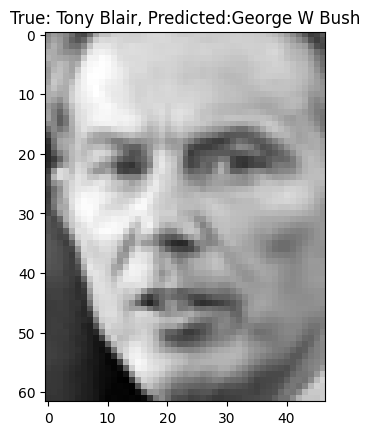

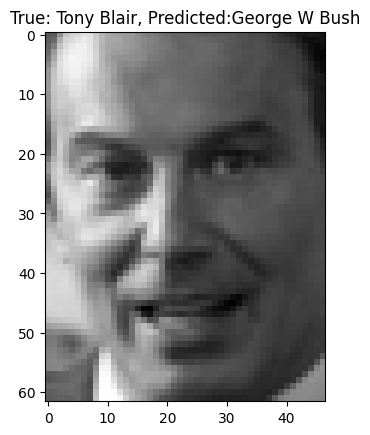

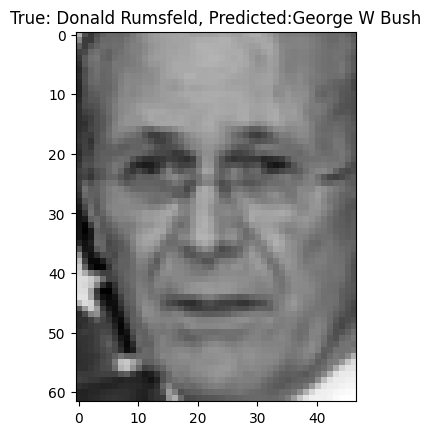

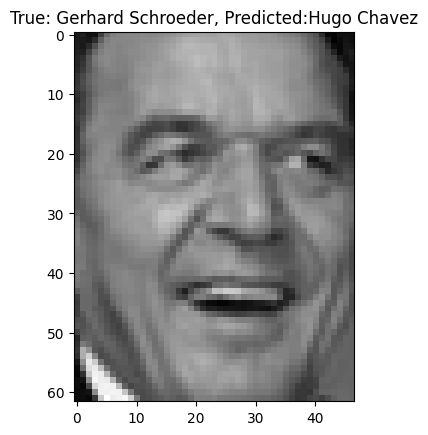

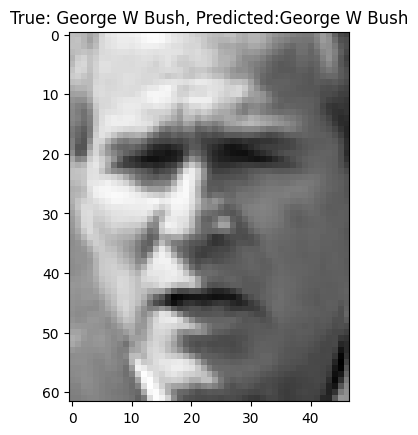

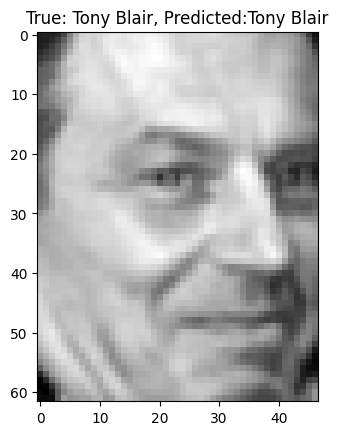

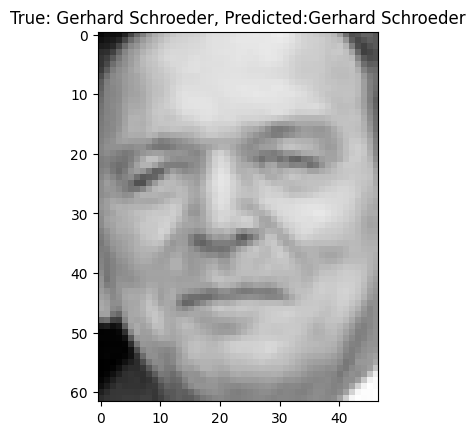

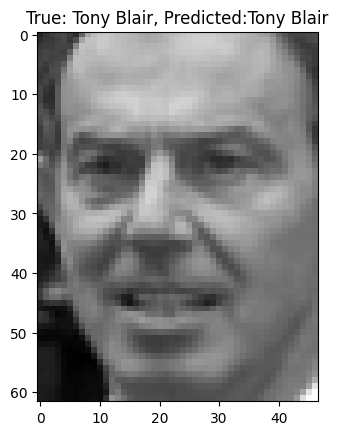

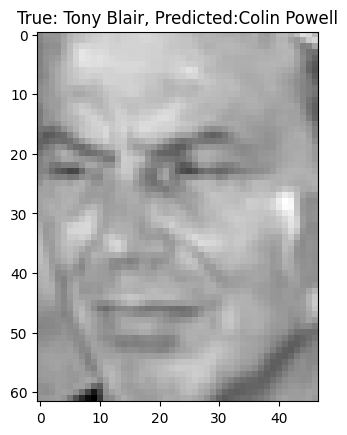

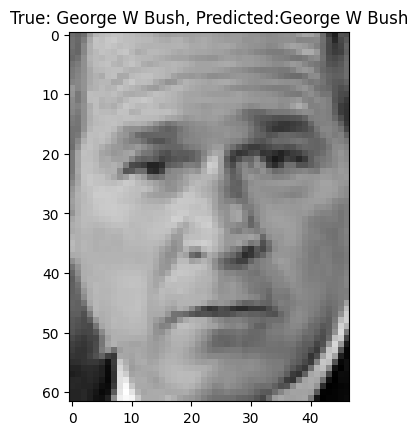

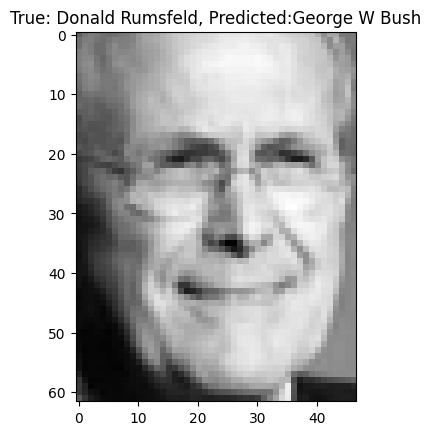

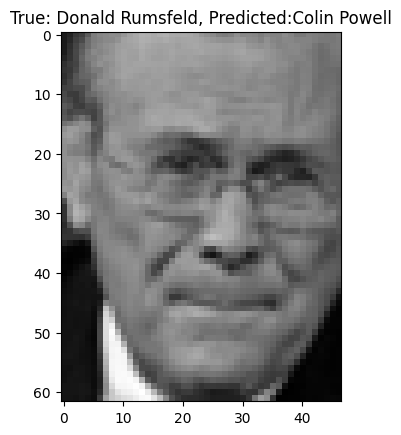

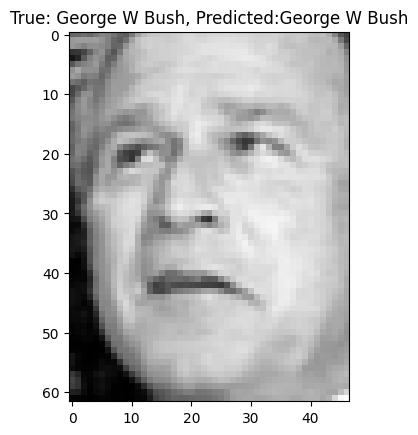

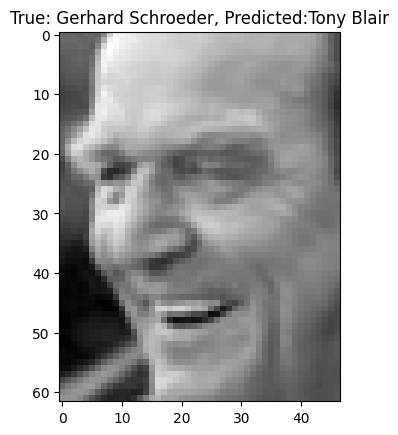

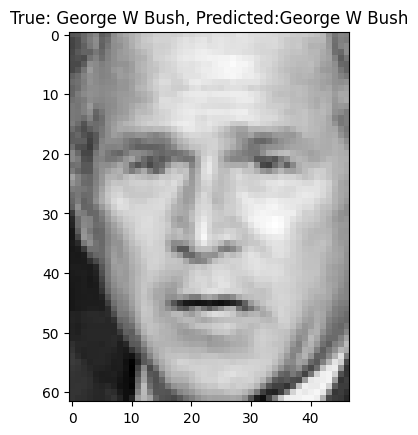

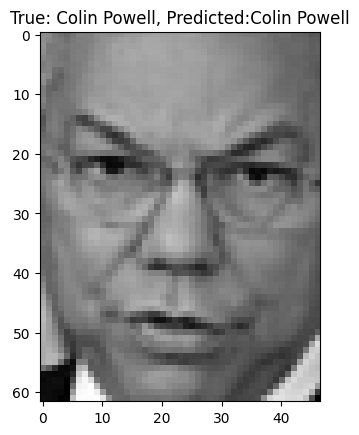

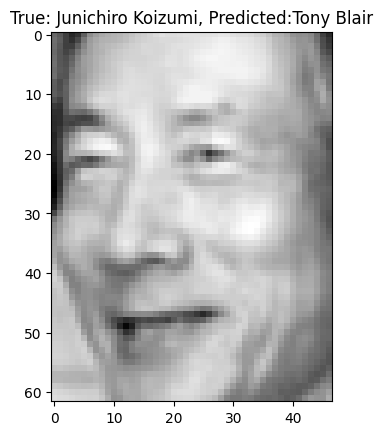

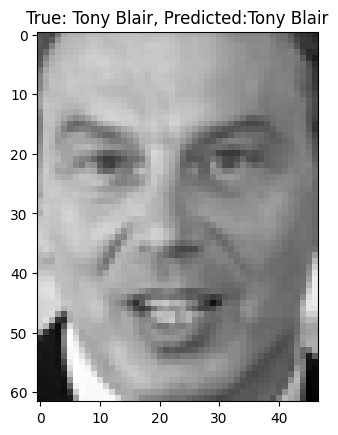

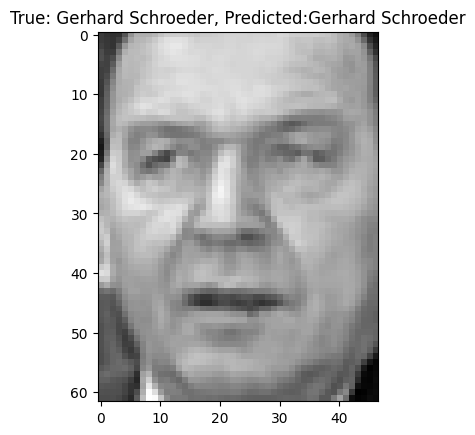

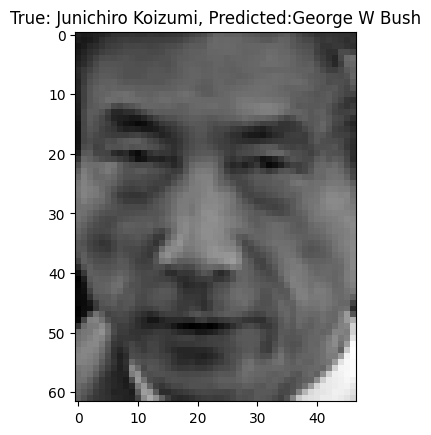

In [161]:
for i in range(20):
  plt.imshow(X_test[i].reshape(62, 47), cmap='gray')
  plt.title(f"True: {target_names[y_test[i]]}, Predicted:{predicted_classes[i]}")
  plt.show()